## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  96.775222   157.932954  0.444850   5.088456  0.728920
1  75.390784   601.873119  0.409675   8.457130  1.590117
2  46.741011   857.548371  0.720472  10.041243  1.247451
3  52.216757  1109.217629  0.705898   1.175595  1.575832
4  52.289164  1024.206917  0.726221   6.841555  1.607357


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9527795	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9463798	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9373395	total: 70.3ms	remaining: 23.3s
3:	learn: 0.9278508	total: 70.7ms	remaining: 17.6s
4:	learn: 0.9187026	total: 71.2ms	remaining: 14.2s
5:	learn: 0.9117493	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9028643	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8915003	total: 72.6ms	remaining: 9.01s
8:	learn: 0.8811484	total: 73.1ms	remaining: 8.04s
9:	learn: 0.8753338	total: 73.5ms	remaining: 7.27s
10:	learn: 0.8663350	total: 73.9ms	remaining: 6.65s
11:	learn: 0.8570281	total: 74.4ms	remaining: 6.13s
12:	learn: 0.8473703	total: 74.9ms	remaining: 5.68s
13:	learn: 0.8396960	total: 75.3ms	remaining: 5.31s
14:	learn: 0.8290702	total: 75.8ms	remaining: 4.97s
15:	learn: 0.8204048	total: 76.2ms	remaining: 4.69s
16:	learn: 0.8127408	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8035581	total: 77.1ms	remaining: 4.21s
18:	learn: 0.7995479	total: 77.7ms	remaining

93:	learn: 0.4637209	total: 109ms	remaining: 1.05s
94:	learn: 0.4614173	total: 109ms	remaining: 1.04s
95:	learn: 0.4591481	total: 110ms	remaining: 1.03s
96:	learn: 0.4565906	total: 110ms	remaining: 1.02s
97:	learn: 0.4535189	total: 111ms	remaining: 1.02s
98:	learn: 0.4512603	total: 111ms	remaining: 1.01s
99:	learn: 0.4480952	total: 111ms	remaining: 1s
100:	learn: 0.4453628	total: 112ms	remaining: 996ms
101:	learn: 0.4429541	total: 112ms	remaining: 989ms
102:	learn: 0.4403411	total: 113ms	remaining: 980ms
103:	learn: 0.4381669	total: 113ms	remaining: 972ms
104:	learn: 0.4362693	total: 113ms	remaining: 965ms
105:	learn: 0.4340613	total: 114ms	remaining: 958ms
106:	learn: 0.4313253	total: 114ms	remaining: 952ms
107:	learn: 0.4297301	total: 114ms	remaining: 945ms
108:	learn: 0.4275133	total: 115ms	remaining: 940ms
109:	learn: 0.4250392	total: 115ms	remaining: 934ms
110:	learn: 0.4228826	total: 116ms	remaining: 928ms
111:	learn: 0.4212966	total: 116ms	remaining: 922ms
112:	learn: 0.4187713	

269:	learn: 0.2410431	total: 187ms	remaining: 505ms
270:	learn: 0.2407202	total: 187ms	remaining: 503ms
271:	learn: 0.2401904	total: 188ms	remaining: 502ms
272:	learn: 0.2394581	total: 188ms	remaining: 501ms
273:	learn: 0.2391357	total: 189ms	remaining: 500ms
274:	learn: 0.2386444	total: 189ms	remaining: 498ms
275:	learn: 0.2381116	total: 189ms	remaining: 497ms
276:	learn: 0.2376501	total: 190ms	remaining: 495ms
277:	learn: 0.2370171	total: 190ms	remaining: 494ms
278:	learn: 0.2364681	total: 191ms	remaining: 492ms
279:	learn: 0.2359918	total: 191ms	remaining: 491ms
280:	learn: 0.2357029	total: 192ms	remaining: 490ms
281:	learn: 0.2351705	total: 192ms	remaining: 489ms
282:	learn: 0.2348727	total: 193ms	remaining: 488ms
283:	learn: 0.2342810	total: 193ms	remaining: 486ms
284:	learn: 0.2334373	total: 193ms	remaining: 485ms
285:	learn: 0.2328361	total: 194ms	remaining: 484ms
286:	learn: 0.2326186	total: 194ms	remaining: 483ms
287:	learn: 0.2320972	total: 195ms	remaining: 481ms
288:	learn: 

506:	learn: 0.1352949	total: 290ms	remaining: 282ms
507:	learn: 0.1348202	total: 291ms	remaining: 282ms
508:	learn: 0.1347170	total: 291ms	remaining: 281ms
509:	learn: 0.1346588	total: 292ms	remaining: 280ms
510:	learn: 0.1343732	total: 292ms	remaining: 279ms
511:	learn: 0.1343158	total: 292ms	remaining: 279ms
512:	learn: 0.1338652	total: 293ms	remaining: 278ms
513:	learn: 0.1334409	total: 293ms	remaining: 277ms
514:	learn: 0.1329359	total: 294ms	remaining: 277ms
515:	learn: 0.1324442	total: 294ms	remaining: 276ms
516:	learn: 0.1319623	total: 295ms	remaining: 275ms
517:	learn: 0.1315259	total: 295ms	remaining: 275ms
518:	learn: 0.1311471	total: 296ms	remaining: 274ms
519:	learn: 0.1306758	total: 296ms	remaining: 273ms
520:	learn: 0.1302511	total: 296ms	remaining: 273ms
521:	learn: 0.1298829	total: 297ms	remaining: 272ms
522:	learn: 0.1294853	total: 297ms	remaining: 271ms
523:	learn: 0.1290259	total: 298ms	remaining: 271ms
524:	learn: 0.1282990	total: 298ms	remaining: 270ms
525:	learn: 

685:	learn: 0.0835700	total: 368ms	remaining: 169ms
686:	learn: 0.0834283	total: 369ms	remaining: 168ms
687:	learn: 0.0833491	total: 369ms	remaining: 168ms
688:	learn: 0.0832251	total: 370ms	remaining: 167ms
689:	learn: 0.0829418	total: 370ms	remaining: 166ms
690:	learn: 0.0826907	total: 371ms	remaining: 166ms
691:	learn: 0.0822895	total: 371ms	remaining: 165ms
692:	learn: 0.0822271	total: 372ms	remaining: 165ms
693:	learn: 0.0821662	total: 372ms	remaining: 164ms
694:	learn: 0.0821067	total: 372ms	remaining: 163ms
695:	learn: 0.0818301	total: 373ms	remaining: 163ms
696:	learn: 0.0817093	total: 373ms	remaining: 162ms
697:	learn: 0.0815344	total: 373ms	remaining: 162ms
698:	learn: 0.0813973	total: 374ms	remaining: 161ms
699:	learn: 0.0813391	total: 374ms	remaining: 160ms
700:	learn: 0.0811168	total: 375ms	remaining: 160ms
701:	learn: 0.0810599	total: 375ms	remaining: 159ms
702:	learn: 0.0808339	total: 376ms	remaining: 159ms
703:	learn: 0.0806680	total: 376ms	remaining: 158ms
704:	learn: 

915:	learn: 0.0433256	total: 473ms	remaining: 43.4ms
916:	learn: 0.0432868	total: 473ms	remaining: 42.8ms
917:	learn: 0.0431359	total: 474ms	remaining: 42.3ms
918:	learn: 0.0429636	total: 474ms	remaining: 41.8ms
919:	learn: 0.0428339	total: 474ms	remaining: 41.3ms
920:	learn: 0.0426944	total: 475ms	remaining: 40.7ms
921:	learn: 0.0425988	total: 475ms	remaining: 40.2ms
922:	learn: 0.0424719	total: 476ms	remaining: 39.7ms
923:	learn: 0.0423260	total: 476ms	remaining: 39.1ms
924:	learn: 0.0422321	total: 476ms	remaining: 38.6ms
925:	learn: 0.0421081	total: 477ms	remaining: 38.1ms
926:	learn: 0.0419656	total: 477ms	remaining: 37.6ms
927:	learn: 0.0418253	total: 477ms	remaining: 37ms
928:	learn: 0.0417329	total: 478ms	remaining: 36.5ms
929:	learn: 0.0415955	total: 478ms	remaining: 36ms
930:	learn: 0.0414780	total: 479ms	remaining: 35.5ms
931:	learn: 0.0413426	total: 479ms	remaining: 34.9ms
932:	learn: 0.0412709	total: 479ms	remaining: 34.4ms
933:	learn: 0.0411563	total: 480ms	remaining: 33.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

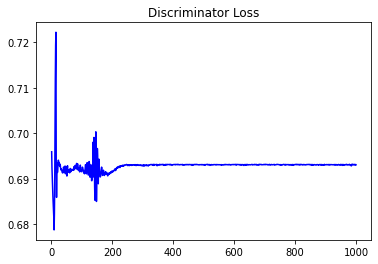

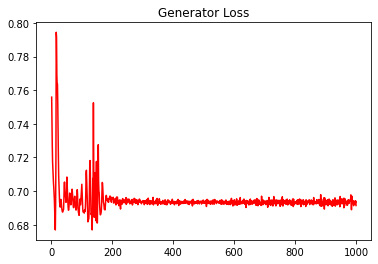

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.26763149701541245


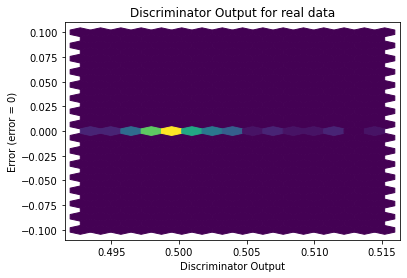

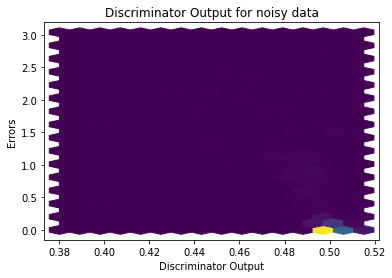

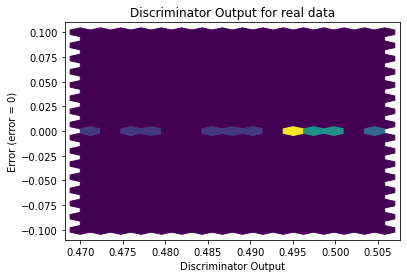

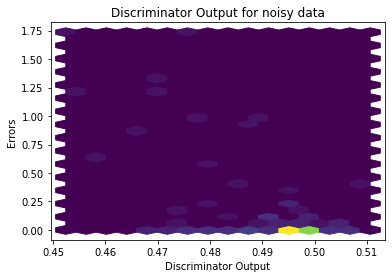

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


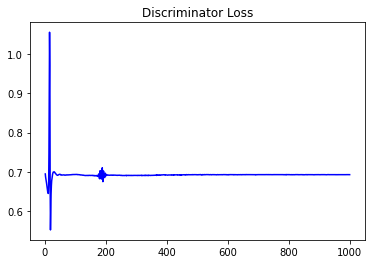

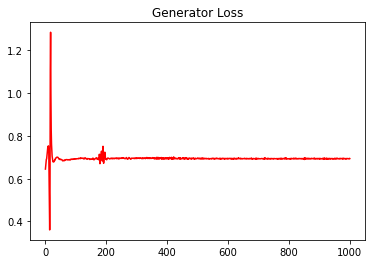

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3511994322839769


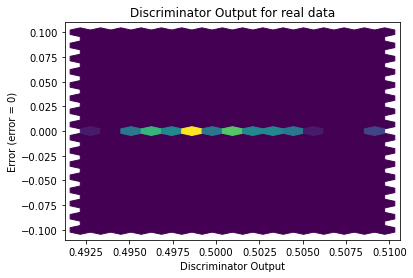

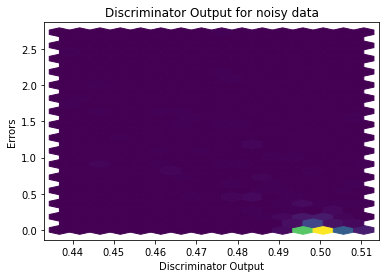

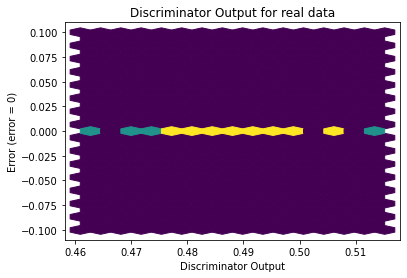

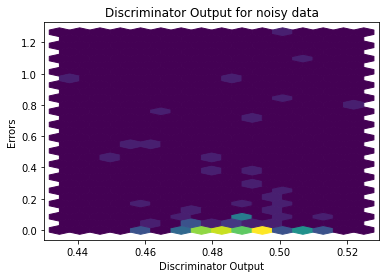

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0743]], requires_grad=True)
